# Proof of Concept (PoC)

The PoC can be divided into to parts:
- Use LLM to read a document and create a knowledge model
- Use LLM to interpret a human request and utilize a knowledge model in response

## Reading a document and building a knowledge model


#### Prerequisites

This notebook requires the following libraries:
 - langchain
 - openai
 - google-search-results

In [2]:
import os
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI, GPT4All
from langchain.chains import LLMChain
import yaml
import re

ModuleNotFoundError: No module named 'flint_graph'

In [2]:
# set prompt template
with open('LLMS_prompt_template.txt', 'r') as f:
    network_model_prompt_template = f.read()

network_model_parser_prompt = PromptTemplate(
    input_variables=["input_text"],
    template_format="jinja2",
    template=network_model_prompt_template,)

In [3]:
# English description of equipment and how they are connected to each other
with open('LLMS_input_text.txt', 'r') as f:
    input_text = f.read()

In [4]:
# network_model_parser_prompt.format(input_text=input_text)

In [5]:
# Create LLM and Chain instances
llm = OpenAI(temperature=0.9)
chain = LLMChain(llm=llm, prompt=network_model_parser_prompt)

In [6]:
# Run chain and receive results
yaml_string = chain.run(input_text)

In [7]:
print(yaml_string)



[Output]
```
nodes:
  - access_point_1
  - access_point_2
  - access_point_3
  - managed_switch
  - network_gateway
  - network_modem
  - network_management_device
  - DNS_server
  - network_monitoring_device
  - laptop
edges:
  - {source: access_point_1, target: managed_switch}
  - {source: access_point_2, target: managed_switch}
  - {source: access_point_3, target: managed_switch}
  - {source: managed_switch, target: network_gateway}
  - {source: network_gateway, target: network_modem}
  - {source: managed_switch, target: network_management_device}
  - {source: managed_switch, target: DNS_server}
  - {source: managed_switch, target: network_monitoring_device}
  - {source: access_point_3, target: laptop}
```


In [8]:
# Pull YAML from code fence
pattern = re.compile("(?:```\n)([\s\S]*)(?:```)")
match = pattern.search(yaml_string)
yaml_string = match[match.lastindex]
nodes_edges = yaml.load(yaml_string, Loader=yaml.FullLoader)

In [9]:
x = graph.graph(default_tags=['Home_Network'])

In [10]:
for node in nodes_edges["nodes"]:
    x.add_node(node, views=['all'])

In [11]:
index = x.index("nodes", by="label")
for edge in nodes_edges["edges"]:
    x.add_edge(index[edge['source']]['id'], index[edge['target']]['id'])

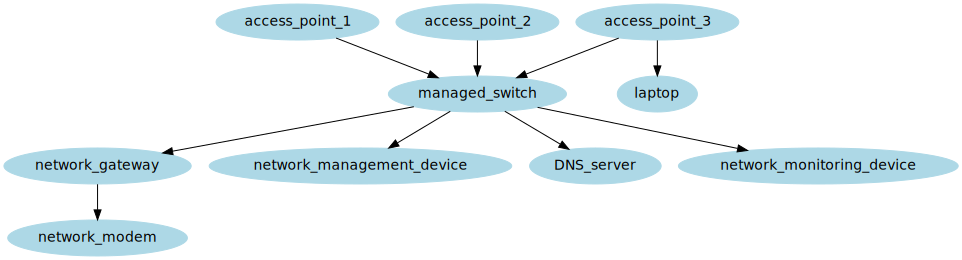

In [12]:
x.show_graph()

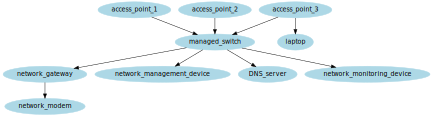

In [16]:
x.show_graph(size='6,20')